In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Dense, Activation,Dropout,Conv1D,MaxPooling1D,LSTM,BatchNormalization

from keras import metrics,layers
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

labelencoder = LabelEncoder()
scaler = MinMaxScaler()

In [2]:
df = pd.read_csv('adult.data',header=None,encoding='utf-8')
td = pd.read_csv('adult.test',header=None,encoding='utf-8')

In [3]:
df.columns=['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']
td.columns=['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']

In [4]:
df=df.replace({' ?':np.nan}).dropna()

In [5]:
df_y=pd.get_dummies(df['education'])
td_y=pd.get_dummies(td['education'])

In [6]:
df=df.drop('education',axis=1)
# df=df.drop('education-num',axis=1)

td=td.drop('education',axis=1)
# td=td.drop('education-num',axis=1)

In [7]:
df

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
df['workclass'] = labelencoder.fit_transform(df['workclass'])
df['marital-status'] = labelencoder.fit_transform(df['marital-status'])
df['occupation'] = labelencoder.fit_transform(df['occupation'])
df['relationship'] = labelencoder.fit_transform(df['relationship'])
df['sex'] = labelencoder.fit_transform(df['sex'])
df['native-country'] = labelencoder.fit_transform(df['native-country'])
df['salary'] = labelencoder.fit_transform(df['salary'])
df['race'] = labelencoder.fit_transform(df['race'])

td['workclass'] = labelencoder.fit_transform(td['workclass'])
td['marital-status'] = labelencoder.fit_transform(td['marital-status'])
td['occupation'] = labelencoder.fit_transform(td['occupation'])
td['relationship'] = labelencoder.fit_transform(td['relationship'])
td['sex'] = labelencoder.fit_transform(td['sex'])
td['native-country'] = labelencoder.fit_transform(td['native-country'])
td['salary'] = labelencoder.fit_transform(td['salary'])
td['race'] = labelencoder.fit_transform(td['race'])

In [9]:
scaler = MinMaxScaler()

#訓練集
train1 = scaler.fit_transform(df)
df = pd.DataFrame(train1,columns=df.columns)

#驗證集
train1 = scaler.fit_transform(td)
td = pd.DataFrame(train1,columns=td.columns)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(df,df_y,test_size=0.2)

In [11]:
model = Sequential()

model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(units=16, kernel_initializer='he_uniform', activation='elu'))
model.add(BatchNormalization())
model.add(Dense(units=32, kernel_initializer='he_uniform', activation='elu')) 
model.add(BatchNormalization())
model.add(Dense(units=64, kernel_initializer='he_uniform', activation='elu'))
model.add(BatchNormalization())
# model.add(Dense(units=128, kernel_initializer='he_uniform', activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(units=64, kernel_initializer='he_uniform', activation='elu'))
model.add(BatchNormalization())
model.add(Dense(units=32, kernel_initializer='he_uniform', activation='elu'))
model.add(BatchNormalization())
model.add(Dense(units=16, kernel_initializer='he_uniform', activation='elu'))
model.add(Dropout(0.1))
model.add(Dense(y_train.shape[1],activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                240       
_________________________________________________________________
batch_normalization (BatchNo (None, 16)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4

In [12]:
precision=tf.keras.metrics.Precision(name='precision')
recall=tf.keras.metrics.Recall(name='recall')
accuracy=tf.keras.metrics.Accuracy(name='accuracy')
callback = tf.keras.callbacks.EarlyStopping(monitor='recall',mode='max', patience=15 ,restore_best_weights=True)

In [13]:
Adam = tf.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.997, epsilon=1e-08, decay=0.0)

In [14]:
model.compile(optimizer=Adam, 
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics = [precision,recall,accuracy]
              )

In [15]:
history = model.fit(x=x_train, y=y_train,epochs=20,batch_size =10, callbacks=[callback])

Epoch 1/20
2413/2413 [==============================] - 5s 1ms/step - loss: 1.4744 - precision: 0.6041 - recall: 0.3231 - accuracy: 0.0000e+00
Epoch 2/20
2413/2413 [==============================] - 3s 1ms/step - loss: 0.9337 - precision: 0.7406 - recall: 0.5607 - accuracy: 0.0000e+00
Epoch 3/20
2413/2413 [==============================] - 3s 1ms/step - loss: 0.7630 - precision: 0.7831 - recall: 0.6377 - accuracy: 0.0000e+00
Epoch 4/20
2413/2413 [==============================] - 3s 1ms/step - loss: 0.6896 - precision: 0.7990 - recall: 0.6705 - accuracy: 0.0000e+00
Epoch 5/20
2413/2413 [==============================] - 3s 1ms/step - loss: 0.5920 - precision: 0.8204 - recall: 0.7267 - accuracy: 0.0000e+00
Epoch 6/20
2413/2413 [==============================] - 3s 1ms/step - loss: 0.5015 - precision: 0.8402 - recall: 0.7744 - accuracy: 0.0000e+00
Epoch 7/20
2413/2413 [==============================] - 3s 1ms/step - loss: 0.4283 - precision: 0.8640 - recall: 0.8139 - accuracy: 0.0000e+00

189/189 [==============================] - 0s 686us/step - loss: 0.9990 - precision: 0.7531 - recall: 0.6844 - accuracy: 0.0000e+00
Precision 0.7530549168586731
Recall 0.6844024658203125
F1 0.7170892830723793


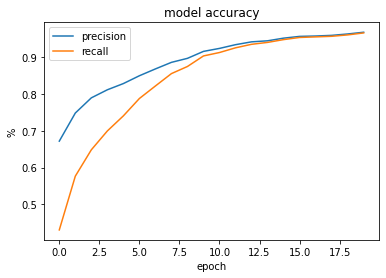

In [17]:
preds = model.evaluate(x = x_test, y = y_test)

F1 = 2 * (preds[1] * preds[2]) / (preds[1] + preds[2])
print('Precision', preds[1])
print('Recall', preds[2])
print('F1',F1)

plt.plot(history.history['precision'])
plt.plot(history.history['recall'])
plt.title('model accuracy')
plt.ylabel('%')
plt.xlabel('epoch')
plt.legend(['precision', 'recall'], loc='upper left')
plt.show()

In [17]:
y_test_predicted = model.evaluate(x_test,y_test)

189/189 [==============================] - 0s 734us/step - loss: 0.0387 - precision: 0.9925 - recall: 0.9920 - accuracy: 0.0000e+00


In [18]:
y_test_predicted

[0.038728415966033936, 0.9925373196601868, 0.9920437335968018, 0.0]

In [19]:
td_predicted = model.evaluate(td,td_y)

509/509 [==============================] - 0s 738us/step - loss: 0.0409 - precision: 0.9907 - recall: 0.9900 - accuracy: 0.0000e+00


In [20]:
td_predicted

[0.04091738536953926, 0.9907191395759583, 0.9900497794151306, 0.0]